# This is a simple simulation of Gaussian random jitter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10,4

In the example below we will create a set of clock TIE data for a 100MHz clock over 1 million cycles. The purely random TIE distribution is generated with a sigma of 1ps and then the period jitter and cycle-cycle jitter distributions are calculated from that.

In [2]:
num_cycles = int(1e6)
rj_tie_rms = 1e-12
clock_freq = 100e6
clock_period = 1/clock_freq
tie_jitter = rj_tie_rms*np.random.randn(num_cycles)

ideal_clock_edges = np.linspace(0,(num_cycles+-1)*clock_period,num_cycles)
jittered_clock_edges = ideal_clock_edges + tie_jitter

period_jitter = np.diff(jittered_clock_edges)

cycle_cycle_jitter = np.diff(period_jitter)

In [3]:
print "Measured RJ TIE rms: "+str(np.std(tie_jitter))
print "Measured Period RMS Jitter: "+str(np.std(period_jitter))
print "Measured Cycle-Cycle RMS Jitter: "+str(np.std(cycle_cycle_jitter))

Measured RJ TIE rms: 1.00079826685e-12
Measured Period RMS Jitter: 1.41530609206e-12
Measured Cycle-Cycle RMS Jitter: 2.45167184225e-12


Note that the standard deviation of the cycle-cycle jitter is the largest, the period jitter is next largest and the TIE jitter is smallest.
Below we show the trend of the 3 distributions.

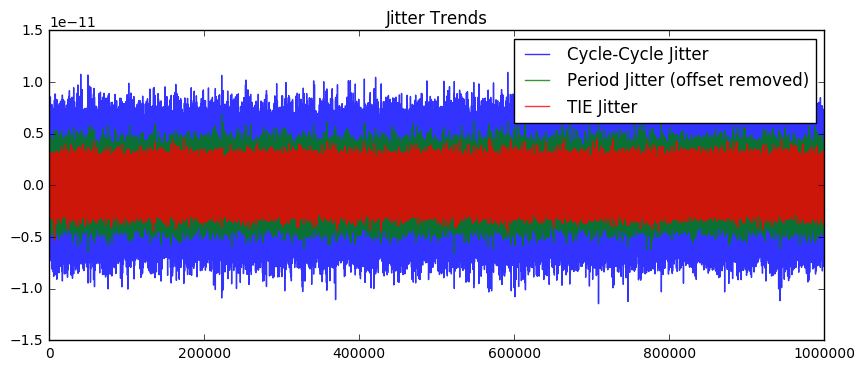

In [4]:
plt.plot(cycle_cycle_jitter, label = "Cycle-Cycle Jitter", alpha = 0.8)
plt.plot(period_jitter-clock_period, label = "Period Jitter (offset removed)", alpha = 0.8)
plt.plot(tie_jitter, label = "TIE Jitter", alpha = 0.8)
plt.legend()
plt.title("Jitter Trends")
plt.show()

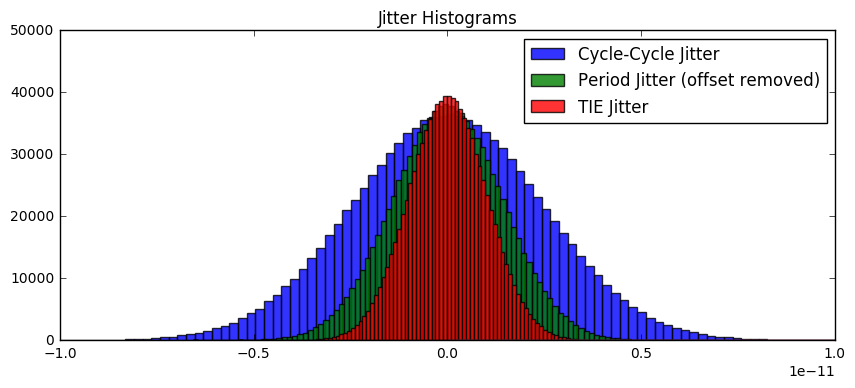

In [5]:
n, bins, patches = plt.hist(cycle_cycle_jitter, bins = 100, label = "Cycle-Cycle Jitter", color = 'blue', alpha = 0.8)
plt.plot(bins)
n, bins, patches = plt.hist(period_jitter-clock_period, bins = 100, label = "Period Jitter (offset removed)", color = 'green', alpha = 0.8)
plt.plot(bins)
n, bins, patches = plt.hist(tie_jitter, bins = 100, label = "TIE Jitter", color = 'red', alpha = 0.8)
plt.plot(bins)
plt.legend()
plt.title("Jitter Histograms")
plt.axis([-1e-11, 1e-11, 0, 50000])
plt.show()

C:\Users\marnj\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


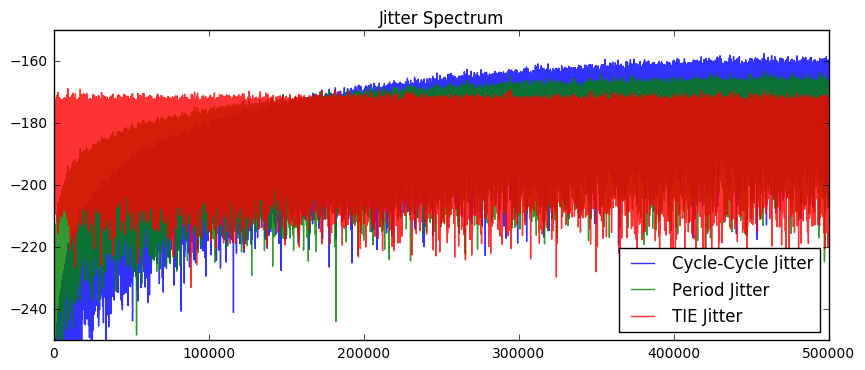

In [6]:
cycle_cycle_jitter_fft = np.fft.fft(cycle_cycle_jitter)
plt.plot(20*np.log10(cycle_cycle_jitter_fft[:len(cycle_cycle_jitter_fft)/2]), label = "Cycle-Cycle Jitter", alpha = 0.8)
period_jitter_fft = np.fft.fft(period_jitter)
plt.plot(20*np.log10(period_jitter_fft[:len(period_jitter_fft)/2]), label = "Period Jitter", alpha = 0.8)
tie_jitter_fft = np.fft.fft(tie_jitter)
plt.plot(20*np.log10(tie_jitter_fft[:len(tie_jitter_fft)/2]), label = "TIE Jitter", alpha = 0.8)
plt.axis([0, len(tie_jitter_fft)/2, -250, -150])
plt.legend(loc = "lower right")
plt.title("Jitter Spectrum")
plt.show()